<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Data2020/BTC_Clustering90_Jan13_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

from google.colab import drive
drive.mount('/content/drive')
print('Authenticated')

Mounted at /content/drive
Authenticated


In [1]:
import pandas as pd 
import numpy as np

In [3]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/BTC_2020_12_31.csv',index_col='Unnamed: 0')
df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility
2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility
2020-12-27,1049825.0,148.0,193716651.0,1.308896e+06,3.033870,4.911576e+11,1.618915e+11,1.866826e+13,0.000295,7.792538,0.000158,4.162860,89.698259,2.370802e+06,1.373446e+08,925.0,1.816875,2.444854e+07,925.0,2.444854e+07,76.839437,114.994093,1.0,26430.856597,261.737332,54.551925,1.858273e+07,2.056073e+07,1.449817e+07,304240.0,808638.0,241838.497017,6.391999e+09,0.657102,17367.771562,0.005215,137.846432,531357.733666,1.404424e+10,0.027924,0.034667,0.034255,4.905674e+10,1.751811,5.544874e+10,8.238012,2.681934e+07,2.100175e+10,50.174128,1.102133e+12,2.398156,0.017810,0.121826,0.112338,0.063885,0.089066,0.123253,0.132847,0.090978,0.028995,0.118794,0.100206,0.595074,0.471821,0.338974,0.247995,0.219001,0.100206,279.837598,94.450699,0.034667,0.034255,0.030030,0.027924,487.366929,54.231945
2020-12-28,1154354.0,160.0,206766595.0,1.292291e+06,3.033361,5.024921e+11,1.656552e+11,1.859959e+13,0.000327,8.834168,0.000164,4.436346,102.752936,2.778372e+06,1.479345e+08,1000.0,1.964065,2.703935e+07,1000.0,2.703935e+07,46.737221,115.311281,1.0,27039.349020,265.812917,52.374044,1.858373e+07,2.056098e+07,1.449831e+07,314503.0,874761.0,397621.711422,1.075143e+10,0.809730,21894.585318,0.005513,149.061442,708320.652738,1.915253e+10,0.027950,0.034447,0.034285,4.526595e+10,1.754172,5.601738e+10,8.071835,2.981772e+07,2.103157e+10,46.170214,1.332533e+12,2.029169,0.021149,0.127496,0.111604,0.063451,0.083734,0.121085,0.132213,0.091246,0.028996,0.118805,0.100221,0.592565,0.471481,0.339268,0.248022,0.219026,0.100221,272.669458,99.165301,0.034447,0.034285,0.030060,0.027950,474.438581,56.992307
2020-12-29,1146131.0,152.0,194179955.0,1.277500e+06,3.006909,5.060833e+11,1.683068e+11,1.859959e+13,0.000313,8.530911,0.000164,4.470274,104.816233,2.854272e+06,1.405378e+08,950.0,1.865880,2.586964e+07,950.0,2.586964e+07,54.785860,114.333016,1.0,27231.203455,276.673228,49.697118,1.858468e+07,2.056122e+07,1.449554e+07,334580.0,924443.0,339224.096073,9.237480e+09,0.765763,20852.655461,0.005631,153.351433,707904.496552,1.927709e+10,0.027902,0.034408,0.034289,5.128744e+10,1.754900,6.052492e+10,8.052861,2.872392e+07,2.106029e+10,48.270913,1.313616e+12,2.072995,0.019785,0.135661,0.105108,0.064458,0.082931,0.120875,0.131812,0.091394,0.028982,0.118768,0.100227,0.592058,0.471183,0.339371,0.247977,0.218996,0.100227,271.682580,100.231688,0.034408,0.034289,0.030010,0.027902,473.544137,57.505101
2020-12-30,1221579.0,172.0,215838093.0,1.254873e+06,3.148488,5.360990e+11,1.702719e+11,1.859959e+13,0.000315,9.091743,0.000171,4.940794,107.456738,3.099548e+06,1.590296e+08,1075.0,2.111160,3.100796e+07,1075.0,3.100796e+07,55.434481,119.111340,1.0,28844.613678,302.442079,46.684376,1.858576e+07,2.056149e+07,1.449659e+07,340919.0,975313.0,335274.336904,9.670859e+09,0.757514,21850.191708,0.005500,158.645375,738813.015952,2.131078e+10,0.028155,0.033276,0.034798,4.675496e+10,1.778938,5.642582e+10,7.611920,3.410751e+07,2.109440e+10,43.062791,1.492255e+12,1.932954,0.019352,0.137151,0.104854,0.064261,0.082758,0.120635,0.130633,0.092268,0.

In [6]:
import matplotlib.pyplot as plt
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-bright')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [7]:
df['PU_future90d']=df['PU Ratio'].shift(-90)
df['NVTAdj90_future90d']=df['NVTAdj90'].shift(-90)
df['PM_future90d']=df['PM'].shift(-90)


In [8]:
df['PriceChange30d']=100*df['PriceUSD'].pct_change(periods=30)
df['PriceChange60d']=100*df['PriceUSD'].pct_change(periods=60)
df['PriceChange90d']=100*df['PriceUSD'].pct_change(periods=90)
df['PriceChange180d']=100*df['PriceUSD'].pct_change(periods=180)

In [9]:
######Calculate the future return in 30, 60, 90 days
df['future30d_ROI']=df['PriceChange30d'].shift(-30)
df['future60d_ROI']=df['PriceChange60d'].shift(-60)
df['future90d_ROI']=df['PriceChange90d'].shift(-90)
df['future180d_ROI']=df['PriceChange180d'].shift(-180)

In [10]:
df_90=df[['PU Ratio','PU_future90d','NVTAdj90','NVTAdj90_future90d','future90d_ROI','PM','PM_future90d']]

In [11]:
df_90=df_90.dropna()

In [12]:
df_90.head()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d
2010-10-15,0.463068,0.973351,154.643925,147.755297,202.476190,30.998689,10.989619
2010-10-16,0.418963,1.519840,144.681892,184.130860,296.029709,11.602674,15.203635
2010-10-17,0.434969,1.393161,147.263082,175.883298,278.431373,18.085074,19.008926
2010-10-18,0.432914,1.387569,145.972987,174.852775,277.724609,11.418262,17.167769
2010-10-19,0.391364,1.125688,137.869691,156.588954,258.296568,4.899486,19.007623


In [13]:
df_90.tail()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d
2020-09-28,22.536272,94.450699,81.646817,114.994093,146.386991,1.372357,2.398156
2020-09-29,22.852920,99.165301,82.229240,115.311281,149.414196,1.088353,2.029169
2020-09-30,22.361687,100.231688,81.412413,114.333016,152.787915,0.861469,2.072995
2020-10-01,21.221049,113.942405,79.771886,119.111340,171.949225,1.245336,1.932954
2020-10-02,20.769136,115.804956,78.741566,118.111923,174.573143,1.064746,2.036377


In [14]:
from sklearn.cluster import KMeans

In [15]:
### We cluster the data by PU today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_90[['PU Ratio','PU_future90d']])
labels90 = model.predict(df_90[['PU Ratio','PU_future90d']])
labels90.reshape(-1,1)
df_90['labels90']=labels90
df_90.head()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d,labels90
2010-10-15,0.463068,0.973351,154.643925,147.755297,202.476190,30.998689,10.989619,0
2010-10-16,0.418963,1.519840,144.681892,184.130860,296.029709,11.602674,15.203635,0
2010-10-17,0.434969,1.393161,147.263082,175.883298,278.431373,18.085074,19.008926,0
2010-10-18,0.432914,1.387569,145.972987,174.852775,277.724609,11.418262,17.167769,0
2010-10-19,0.391364,1.125688,137.869691,156.588954,258.296568,4.899486,19.007623,0


In [16]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,18.143192,19.704624
1,60.141119,428.830426
2,434.320782,84.412407
3,96.148253,93.616144


In [17]:
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

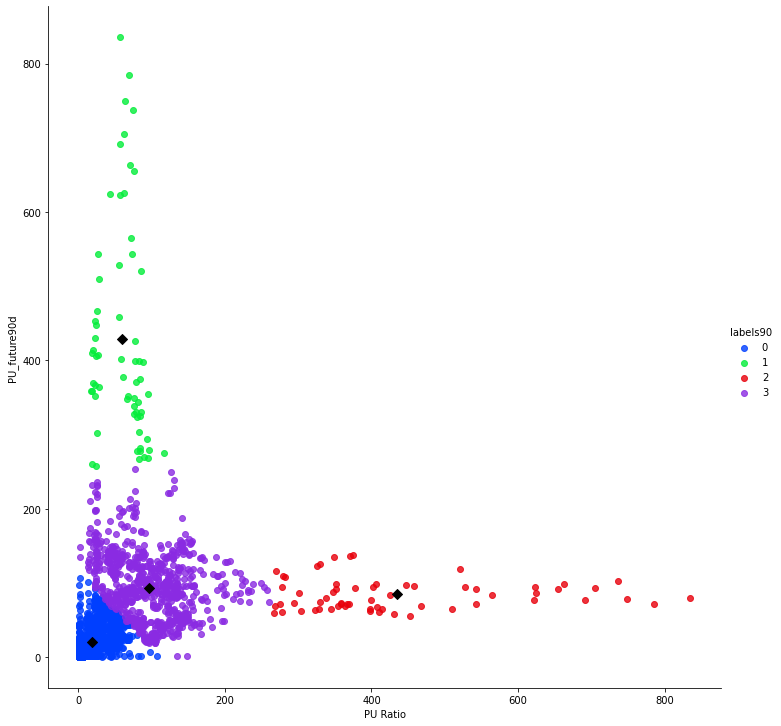

In [20]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future90d', data=df_90, hue='labels90', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('/content/drive/My Drive/CVML2021/PU90_full')

In [21]:
df_90_ROI=df_90[['future90d_ROI','labels90']].groupby('labels90', as_index=False).agg(['min', 'max','mean','std'])
df_90_ROI.columns = ["_".join(x) for x in df_90_ROI.columns.ravel()]
df_90_ROI.index.name=None
df_90_ROI.head()

,future90d_ROI_min,future90d_ROI_max,future90d_ROI_mean,future90d_ROI_std
0,-83.710800,2602.078891,92.068035,270.041520
1,103.261022,827.458889,375.414569,209.701226
2,-61.350263,8.715075,-37.297839,19.283813
3,-76.415609,3171.652729,44.768816,197.947459


In [22]:
df90_PU=df_90[['PU Ratio', 'PU_future90d','labels90']].groupby('labels90').agg(['min', 'max','mean','std'])
df90_PU=df90_PU.transpose()
df90_PU

labels90                    0           1           2           3
PU Ratio     min     0.331046   16.977498  266.814370    1.837340
             max   106.877612  117.392917  835.348317  259.790525
             mean   18.162701   60.141119  434.320782   96.178938
             std    15.494204   26.988422  145.944437   45.141251
PU_future90d min     0.331046  257.468286   55.990583    1.280254
             max   106.877612  835.348317  138.215756  253.371533
             mean   19.713241  428.830426   84.412407   93.676446
             std    16.697008  146.877279   20.644959   45.711160

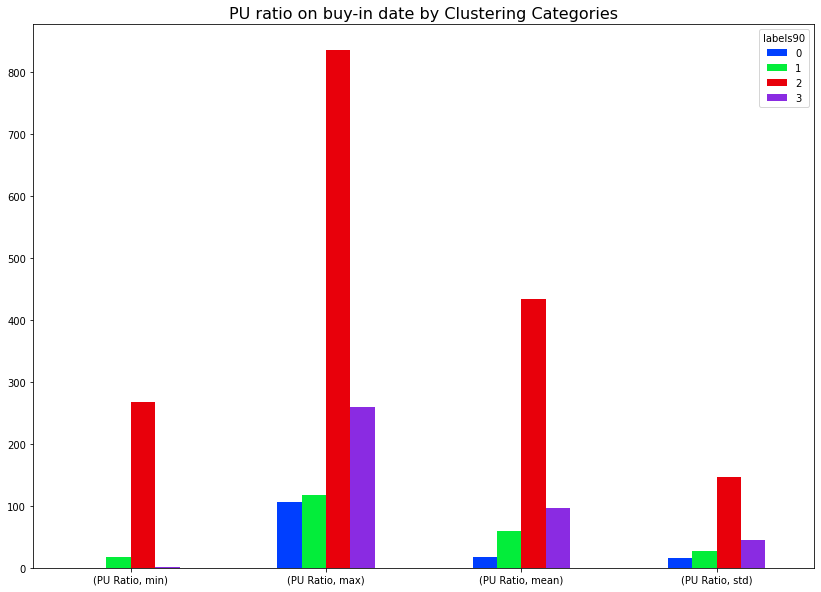

In [23]:
df90_PU.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/90PU_full_buyin')

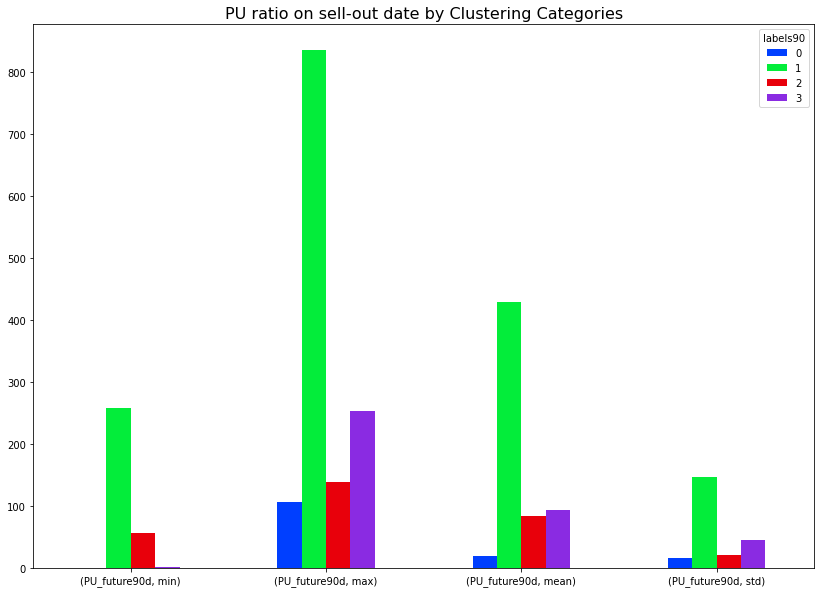

In [27]:
df90_PU.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/90PU_full_sellout')

In [25]:
df_90_ROI=df_90_ROI.transpose()
df_90_ROI.columns=['labels90=0', 'labels90=1','labels90=2', 'labels90=3']
df_90_ROI.head()

,labels90=0,labels90=1,labels90=2,labels90=3
future90d_ROI_min,-83.710800,103.261022,-61.350263,-76.415609
future90d_ROI_max,2602.078891,827.458889,8.715075,3171.652729
future90d_ROI_mean,92.068035,375.414569,-37.297839,44.768816
future90d_ROI_std,270.041520,209.701226,19.283813,197.947459


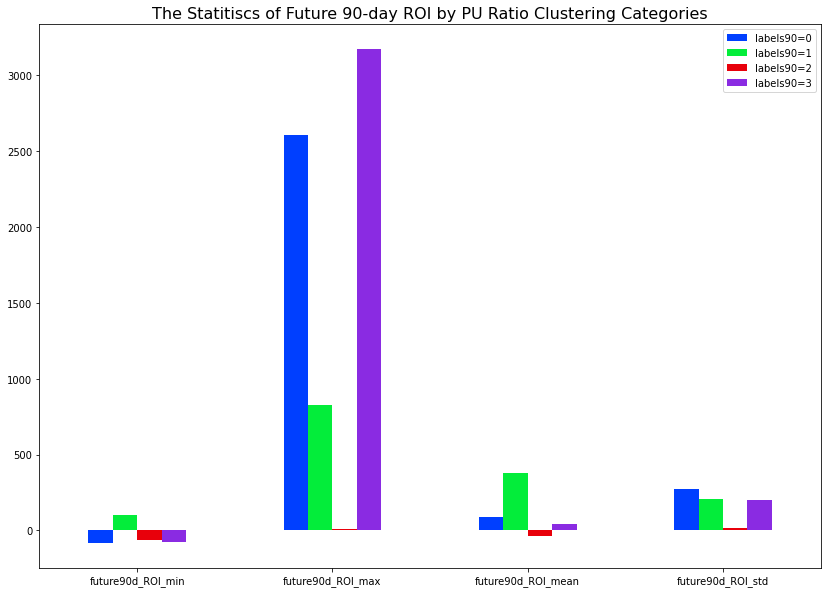

In [28]:
df_90_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 90-day ROI by PU Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/90ROI_full')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

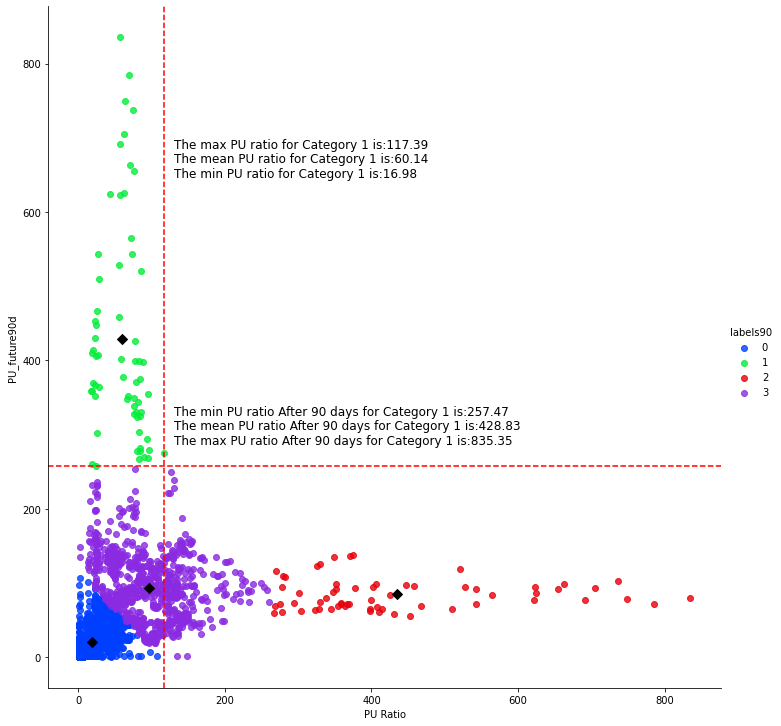

In [30]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future90d', data=df_90, hue='labels90', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.axvline(117.392917, color='red', linestyle='--')
plt.axhline(257.468286, color='red', linestyle='--')
plt.annotate('The max PU ratio for Category 1 is:117.39',
            xy=(130, 700), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The mean PU ratio for Category 1 is:60.14',
            xy=(130, 680), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The min PU ratio for Category 1 is:16.98',
            xy=(130, 660), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)

plt.annotate('The max PU ratio After 90 days for Category 1 is:835.35',
            xy=(130, 300), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The mean PU ratio After 90 days for Category 1 is:428.83',
            xy=(130, 320), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The min PU ratio After 90 days for Category 1 is:257.47',
            xy=(130, 340), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.savefig('/content/drive/My Drive/CVML2021/PU90_full_annoted')

In [31]:
df_90.head()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d,labels90
2010-10-15,0.463068,0.973351,154.643925,147.755297,202.476190,30.998689,10.989619,0
2010-10-16,0.418963,1.519840,144.681892,184.130860,296.029709,11.602674,15.203635,0
2010-10-17,0.434969,1.393161,147.263082,175.883298,278.431373,18.085074,19.008926,0
2010-10-18,0.432914,1.387569,145.972987,174.852775,277.724609,11.418262,17.167769,0
2010-10-19,0.391364,1.125688,137.869691,156.588954,258.296568,4.899486,19.007623,0


In [32]:
### We cluster the data by NVT today and after n days
### We cluster the data by PU today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_90[['NVTAdj90','NVTAdj90_future90d']])
labels90_NVT = model.predict(df_90[['NVTAdj90','NVTAdj90_future90d']])
labels90_NVT.reshape(-1,1)
df_90['labels90_NVT']=labels90_NVT
df_90.head()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d,labels90,labels90_NVT
2010-10-15,0.463068,0.973351,154.643925,147.755297,202.476190,30.998689,10.989619,0,3
2010-10-16,0.418963,1.519840,144.681892,184.130860,296.029709,11.602674,15.203635,0,3
2010-10-17,0.434969,1.393161,147.263082,175.883298,278.431373,18.085074,19.008926,0,3
2010-10-18,0.432914,1.387569,145.972987,174.852775,277.724609,11.418262,17.167769,0,3
2010-10-19,0.391364,1.125688,137.869691,156.588954,258.296568,4.899486,19.007623,0,3


In [33]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,44.244071,44.054823
1,135.408785,42.303687
2,72.623796,79.387642
3,175.889072,167.566904


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

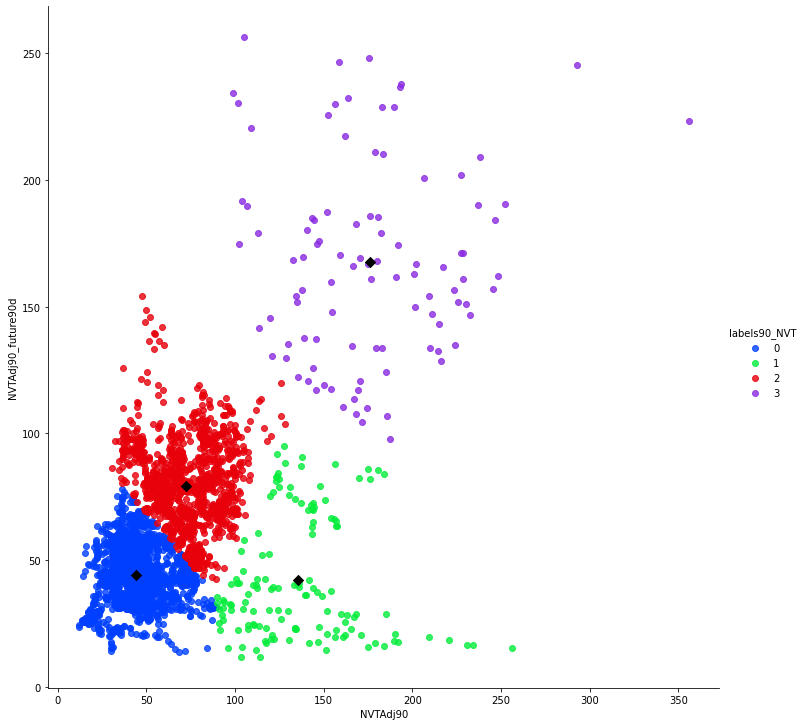

In [34]:
plt.figure(figsize=(14, 10))
sns.lmplot('NVTAdj90', 'NVTAdj90_future90d', data=df_90, hue='labels90_NVT', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('/content/drive/My Drive/CVML2021/NVT90_full')

In [35]:
df_90_ROI=df_90[['future90d_ROI','labels90_NVT']].groupby('labels90_NVT', as_index=False).agg(['min', 'max','mean','std'])
df_90_ROI.columns = ["_".join(x) for x in df_90_ROI.columns.ravel()]
df_90_ROI.index.name=None
df_90_ROI.head()

,future90d_ROI_min,future90d_ROI_max,future90d_ROI_mean,future90d_ROI_std
0,-83.710800,2173.169200,71.409325,208.467188
1,-76.415609,1053.449720,110.938857,195.983147
2,-48.189653,2258.089533,66.802580,257.464139
3,102.243083,3171.652729,534.655226,594.979443


In [36]:
df90_NVT=df_90[['NVTAdj90', 'NVTAdj90_future90d','labels90_NVT']].groupby('labels90_NVT').agg(['min', 'max','mean','std'])
df90_NVT=df90_NVT.transpose()
df90_NVT

labels90_NVT                     0           1           2           3
NVTAdj90           min   11.810125   89.758464   30.383771   99.115684
                   max   89.119341  256.362055  128.436158  355.931337
                   mean  44.244071  135.408785   72.623796  175.889072
                   std   13.106639   31.500918   16.878156   44.425333
NVTAdj90_future90d min   13.714733   11.810125   42.702466   97.857132
                   max   78.205966   95.015880  154.082818  256.362055
                   mean  44.054823   42.303687   79.387642  167.566904
                   std   10.819819   23.868432   16.399669   39.056376

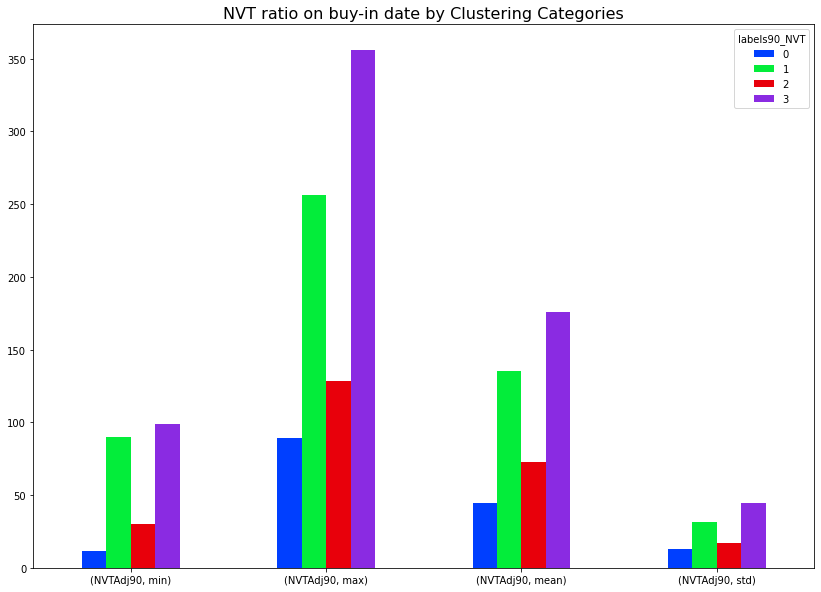

In [37]:
df90_NVT.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90NVT_full_buyin')

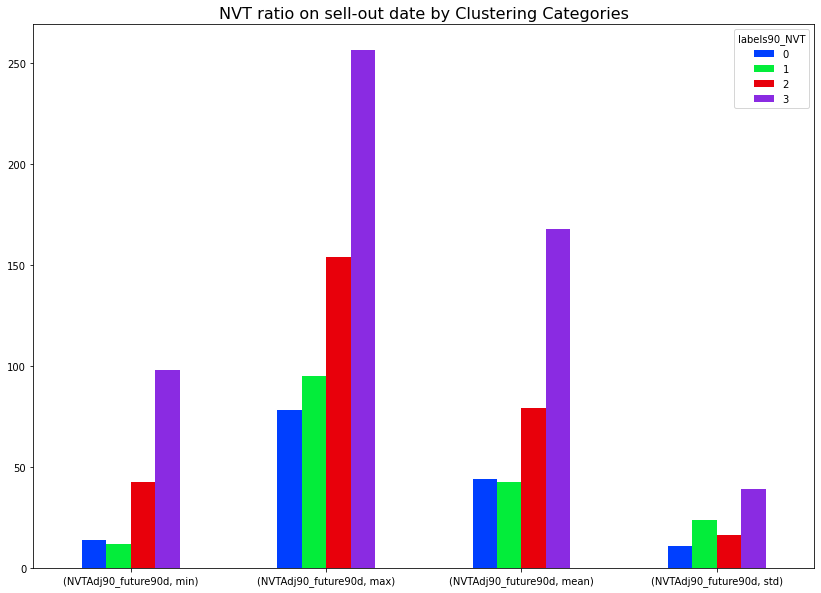

In [38]:
df90_NVT.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90NVT_full_sellout')

In [39]:
df_90_ROI=df_90_ROI.transpose()
df_90_ROI.columns=['labels90_NVT=0', 'labels90_NVT=1','labels90_NVT=2', 'labels90_NVT=3']
df_90_ROI.head()

,labels90_NVT=0,labels90_NVT=1,labels90_NVT=2,labels90_NVT=3
future90d_ROI_min,-83.710800,-76.415609,-48.189653,102.243083
future90d_ROI_max,2173.169200,1053.449720,2258.089533,3171.652729
future90d_ROI_mean,71.409325,110.938857,66.802580,534.655226
future90d_ROI_std,208.467188,195.983147,257.464139,594.979443


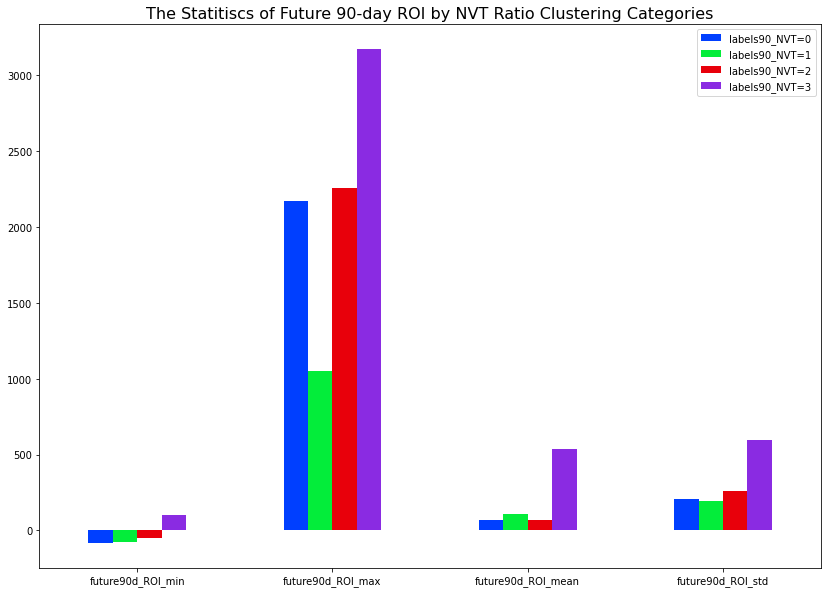

In [41]:
df_90_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 90-day ROI by NVT Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/90ROI_full_NVT')

In [42]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_90[['PM','PM_future90d']])
labels90 = model.predict(df_90[['PM','PM_future90d']])
labels90.reshape(-1,1)
df_90['labels90']=labels90
df_90.head()

,PU Ratio,PU_future90d,NVTAdj90,NVTAdj90_future90d,future90d_ROI,PM,PM_future90d,labels90,labels90_NVT
2010-10-15,0.463068,0.973351,154.643925,147.755297,202.476190,30.998689,10.989619,1,3
2010-10-16,0.418963,1.519840,144.681892,184.130860,296.029709,11.602674,15.203635,1,3
2010-10-17,0.434969,1.393161,147.263082,175.883298,278.431373,18.085074,19.008926,1,3
2010-10-18,0.432914,1.387569,145.972987,174.852775,277.724609,11.418262,17.167769,1,3
2010-10-19,0.391364,1.125688,137.869691,156.588954,258.296568,4.899486,19.007623,0,3


In [43]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,1.440739,1.331965
1,19.782012,7.853274
2,113.940949,18.528135
3,51.694165,14.142391


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

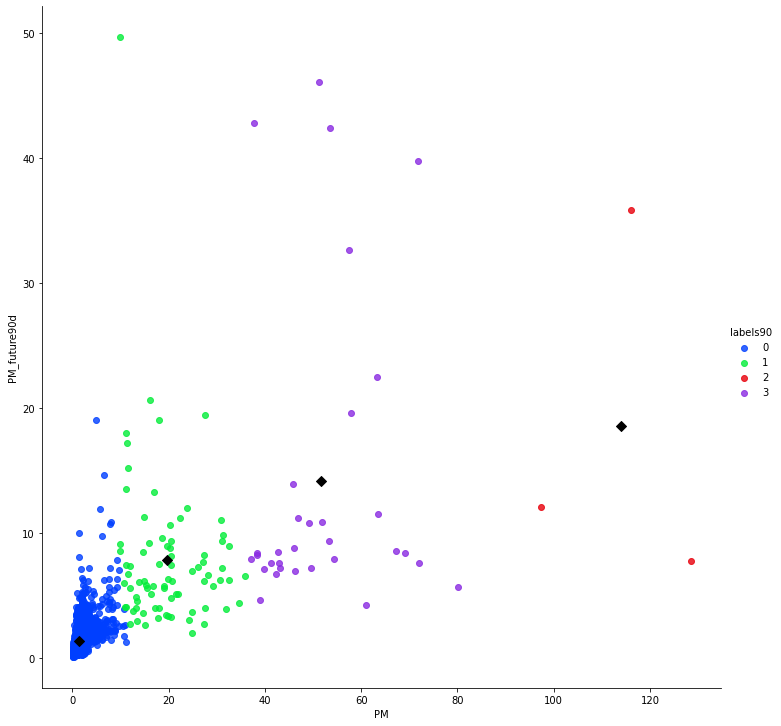

In [45]:
plt.figure(figsize=(14, 10))
sns.lmplot('PM','PM_future90d', data=df_90, hue='labels90', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('/content/drive/My Drive/CVML2021/PM90_full')

In [46]:
df_90_ROI=df_90[['future90d_ROI','labels90']].groupby('labels90', as_index=False).agg(['min', 'max','mean','std'])
df_90_ROI.columns = ["_".join(x) for x in df_90_ROI.columns.ravel()]
df_90_ROI.index.name=None
df_90_ROI.head()

,future90d_ROI_min,future90d_ROI_max,future90d_ROI_mean,future90d_ROI_std
0,-83.710800,3171.652729,78.304400,257.445587
1,58.665282,654.520264,255.238370,115.198540
2,102.243083,265.269561,179.493701,81.846918
3,124.929316,391.235202,261.056437,72.786283


In [47]:
df90_PM=df_90[['PM','PM_future90d','labels90']].groupby('labels90').agg(['min', 'max','mean','std'])
df90_PM=df90_PM.transpose()
df90_PM

labels90                   0          1           2          3
PM           min    0.081659   9.833799   97.428060  37.052913
             max   11.224044  35.803533  128.418139  80.100067
             mean   1.440739  19.782012  113.940949  51.694165
             std    1.362590   7.027061   15.595009  11.667708
PM_future90d min    0.081659   1.973925    7.747271   4.213835
             max   19.007623  49.639999   35.803533  46.100227
             mean   1.331965   7.853274   18.528135  14.142391
             std    1.135842   6.241299   15.113659  12.325864

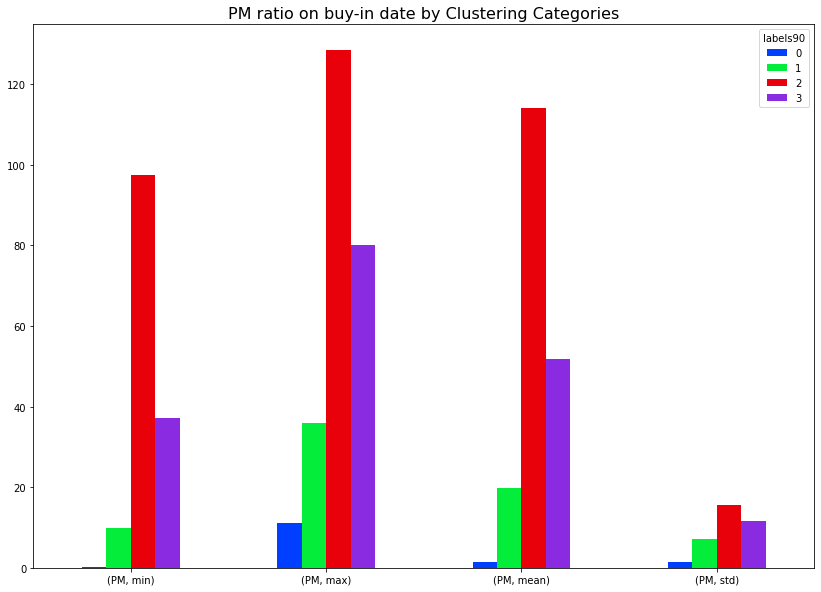

In [48]:
df90_PM.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90PM_full_buyin')

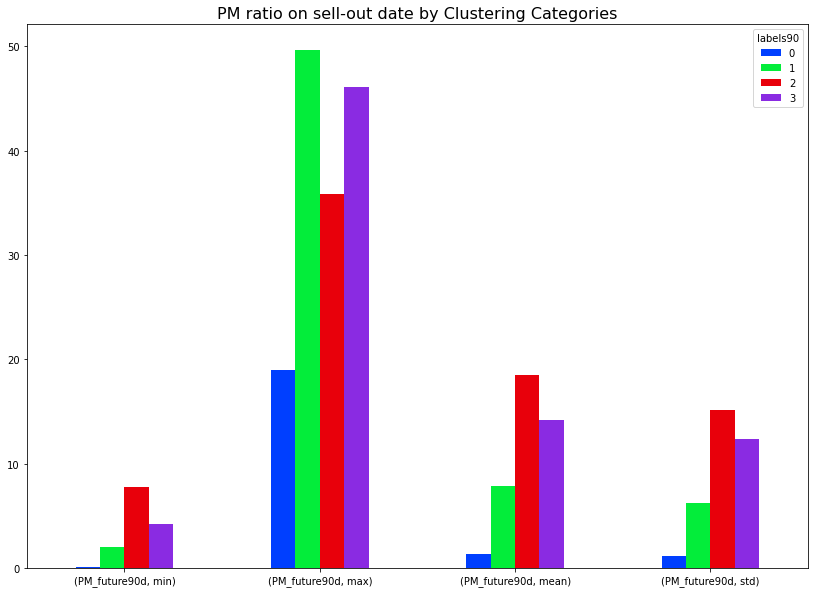

In [49]:
df90_PM.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90PM_full_sell-out')

In [50]:
df_90_ROI=df_90_ROI.transpose()
df_90_ROI.columns=['labels90=0', 'labels90=1','labels90=2', 'labels90=3']
df_90_ROI.head()

,labels90=0,labels90=1,labels90=2,labels90=3
future90d_ROI_min,-83.710800,58.665282,102.243083,124.929316
future90d_ROI_max,3171.652729,654.520264,265.269561,391.235202
future90d_ROI_mean,78.304400,255.238370,179.493701,261.056437
future90d_ROI_std,257.445587,115.198540,81.846918,72.786283


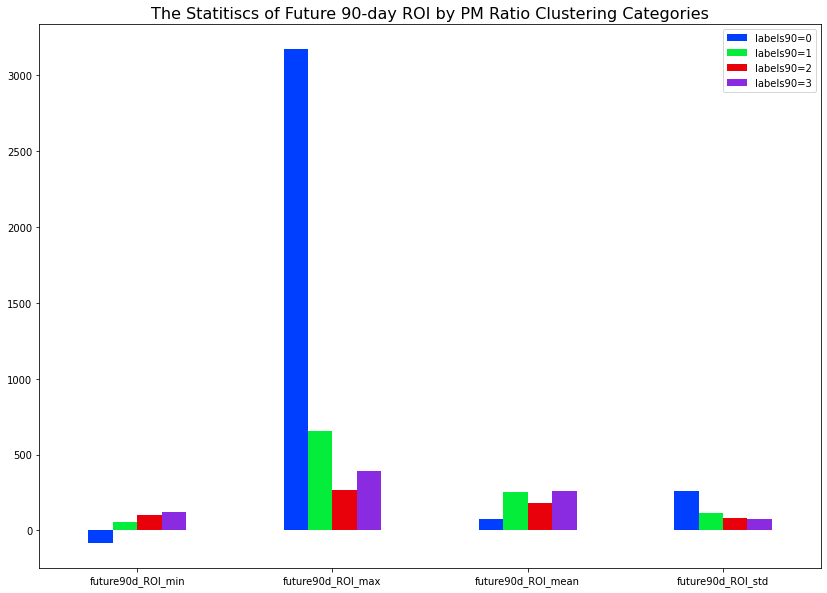

In [52]:
df_90_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 90-day ROI by PM Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('/content/drive/My Drive/CVML2021/90ROI_fullPM')

In [53]:
df.to_csv('btc_Kmeans_2020_13_31.csv')